In [92]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df=pd.read_csv(r"C:\Users\I.T-Store\Downloads\bestsellers with categories.csv")
df.head()               

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [94]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [95]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [96]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [97]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
# Which author has written more books?
df["Author"].value_counts()

In [99]:
# How many books sold price greater than 50?
df[df['Price']> 50]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


In [105]:
#What is the most expensive book in the dataset, and does it have a high
#user rating
most_expensive_book = df[df['Price'] == df['Price'].max()]
print("Most Expensive Book:")
print(most_expensive_book[['Name', 'Author', 'Price', 'User Rating']])

Most Expensive Book:
                                                 Name  \
69  Diagnostic and Statistical Manual of Mental Di...   
70  Diagnostic and Statistical Manual of Mental Di...   

                              Author  Price  User Rating  
69  American Psychiatric Association    105          4.5  
70  American Psychiatric Association    105          4.5  


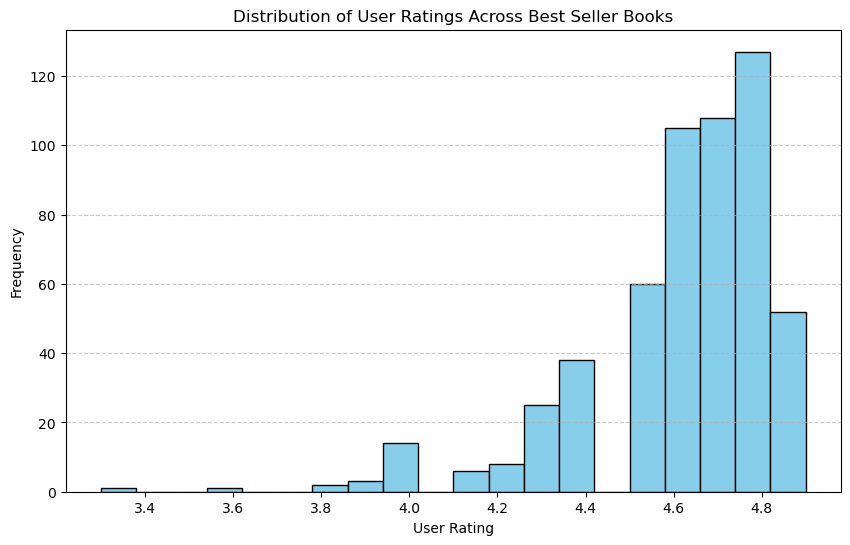

In [100]:
# What is the distribution of user ratings across the best seller books?
plt.figure(figsize=(10, 6))
plt.hist(df['User Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ratings Across Best Seller Books')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [101]:
#Which author has the highest  user rating for their books in the
#dataset?
df2=df.groupby(['Author'])['User Rating'].sum().sort_values(ascending=False).head(5)

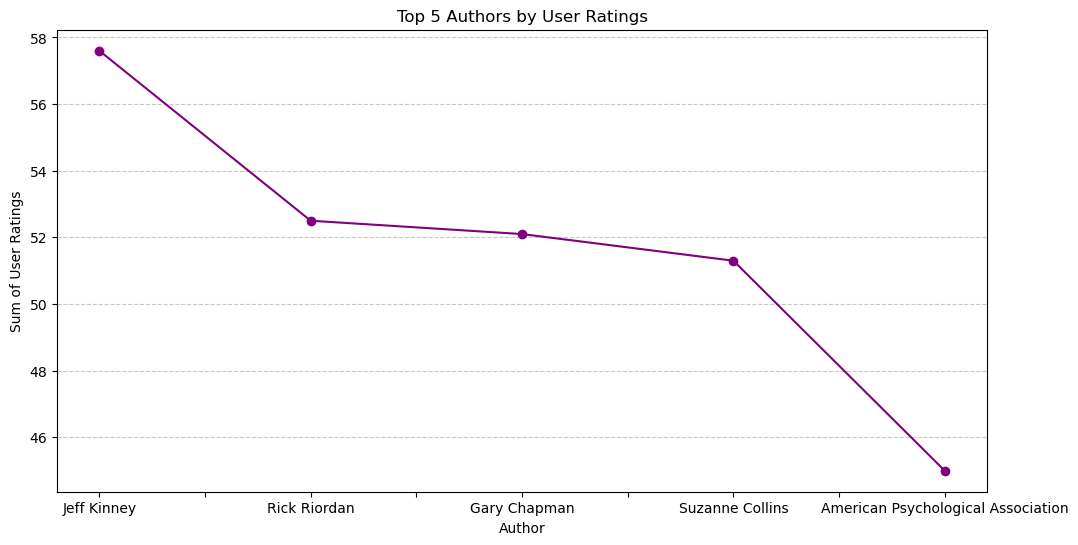

In [102]:
df2.plot(kind='line', marker='o', color='purple',figsize=(12,6))
plt.title('Top 5 Authors by User Ratings')
plt.xlabel('Author')
plt.ylabel('Sum of User Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

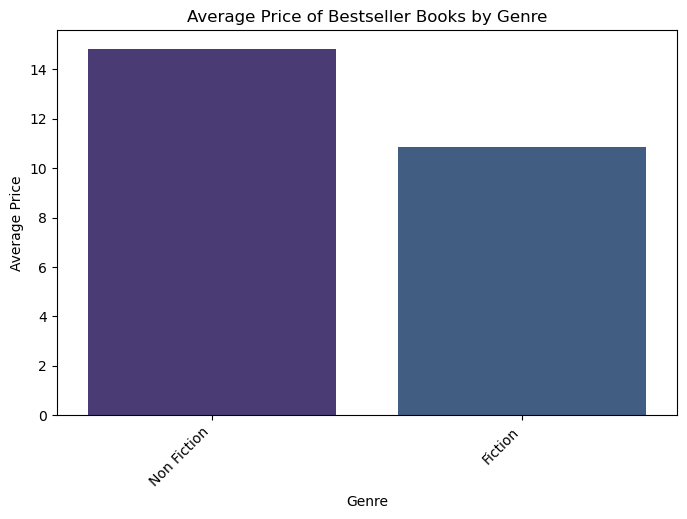

In [129]:
#How does the average price of books vary by genre?
sns.set_palette("viridis")
plt.figure(figsize=(8, 5))
sns.barplot(x='Genre', y='Price', data=df, errorbar=None)  
plt.title('Average Price of Bestseller Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right'); 

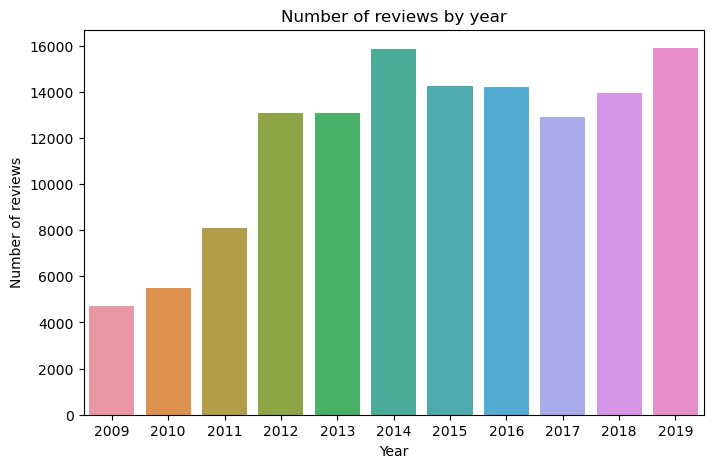

In [128]:
sns.color_palette("dark")
plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='Reviews', data=df,errorbar=None)  
plt.title('Number of reviews by year')
plt.xlabel('Year')
plt.ylabel('Number of reviews');


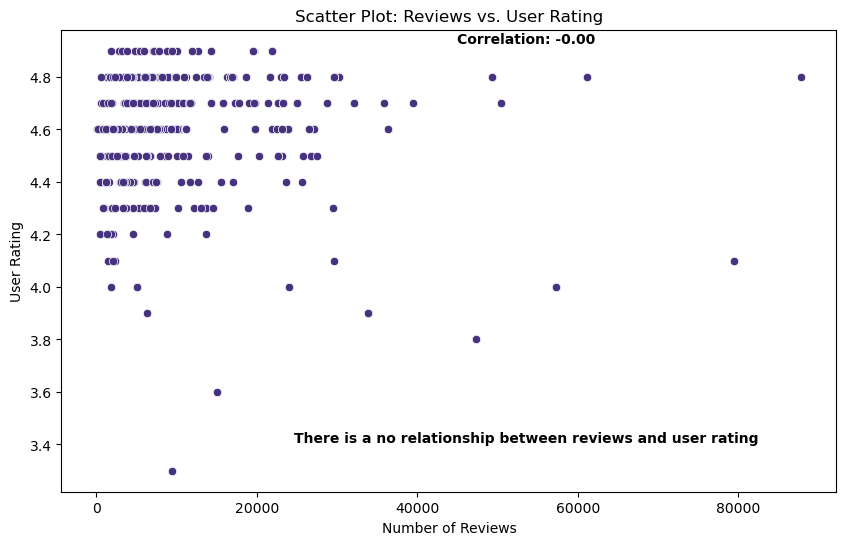

In [127]:
#Is there a correlation between the number of reviews and the user rating?
correlation = df['Reviews'].corr(df['User Rating'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='User Rating', data=df)
plt.title('Scatter Plot: Reviews vs. User Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.text(0.6, 0.10, 'There is a no relationship between reviews and user rating', transform=plt.gca().transAxes, ha='center', va='bottom',weight='bold')
plt.text(0.6, 0.98, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, ha='center', va='center',weight='bold')
plt.show()